# Minor Project 4 - Random Forest


## Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

## Classification

## Import Dataset

In [3]:
df = pd.read_csv("/content/framingham.csv")

## Initial Analysis

In [4]:
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


In [6]:
print(df.describe(include = 'all'))

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

## Check for Duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None



## Outlier Detection and Correction






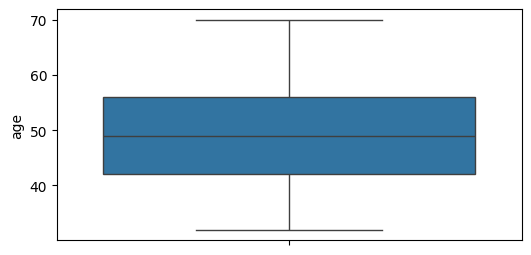

<Figure size 640x480 with 0 Axes>

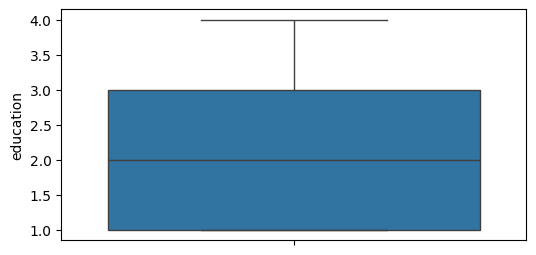

<Figure size 640x480 with 0 Axes>

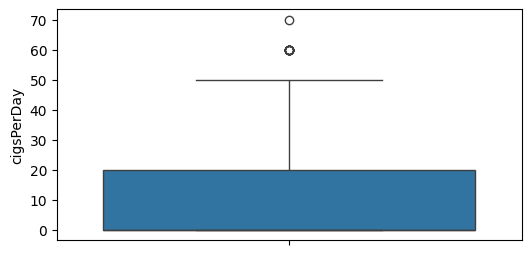

<Figure size 640x480 with 0 Axes>

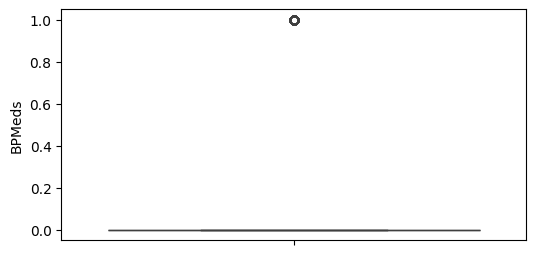

<Figure size 640x480 with 0 Axes>

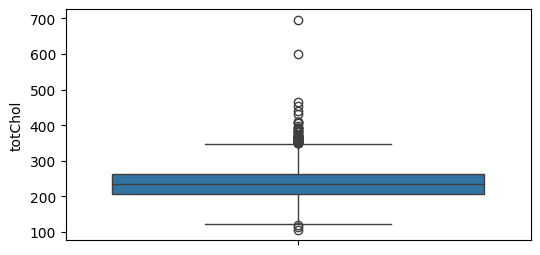

<Figure size 640x480 with 0 Axes>

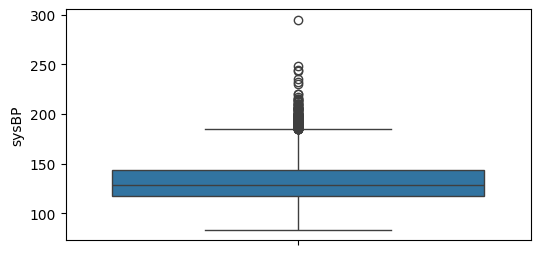

<Figure size 640x480 with 0 Axes>

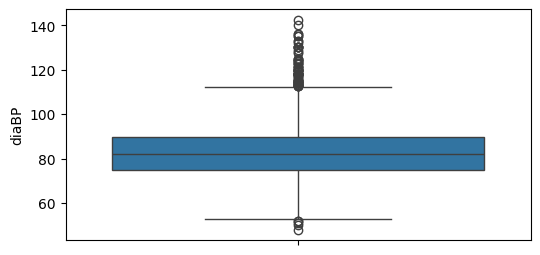

<Figure size 640x480 with 0 Axes>

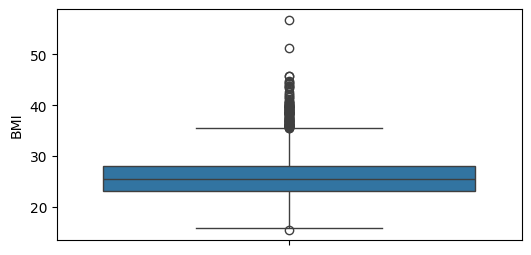

<Figure size 640x480 with 0 Axes>

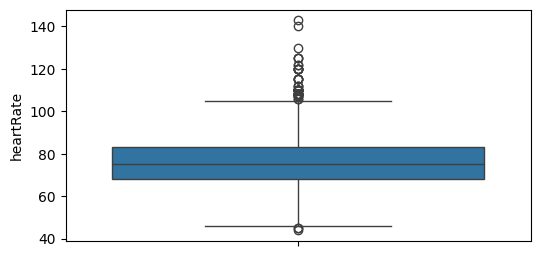

<Figure size 640x480 with 0 Axes>

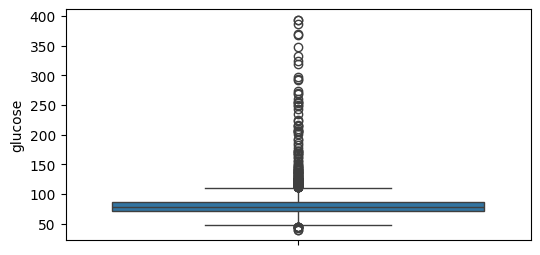

<Figure size 640x480 with 0 Axes>

In [9]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
bool_cols = [col for col in num_cols if set(df[col].unique()) <= {0, 1}]

num_cols = [col for col in num_cols if col not in bool_cols]

for col in num_cols:
    plt.figure(figsize = (6,3))
    sns.boxplot(y = df[col])
    plt.show()
    plt.tight_layout()
    plt.pause(0.5)


In [10]:
def outlier_correction(df, col, show_plot = True):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

    return df

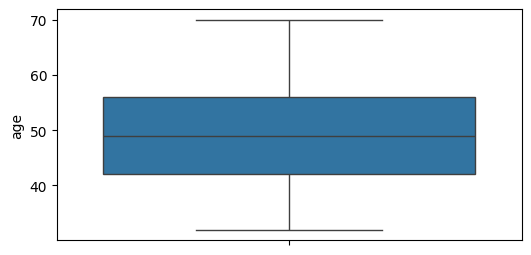

<Figure size 640x480 with 0 Axes>

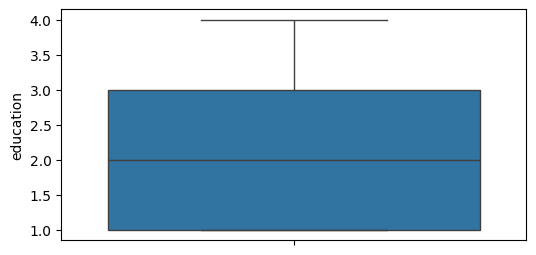

<Figure size 640x480 with 0 Axes>

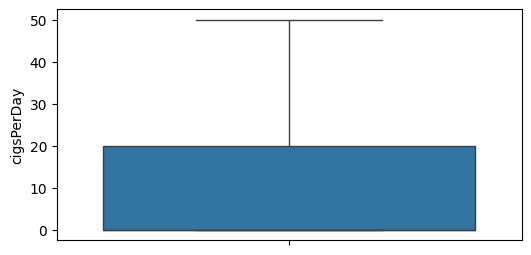

<Figure size 640x480 with 0 Axes>

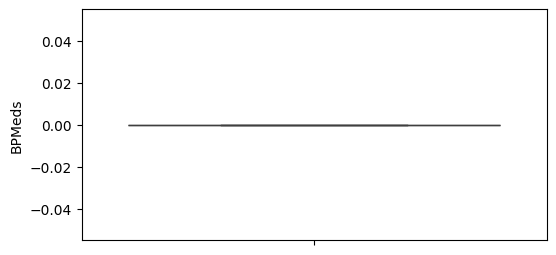

<Figure size 640x480 with 0 Axes>

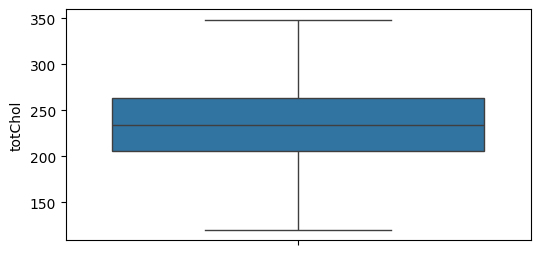

<Figure size 640x480 with 0 Axes>

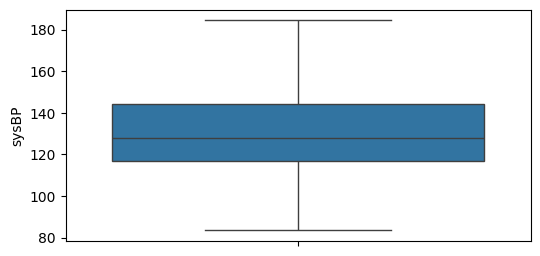

<Figure size 640x480 with 0 Axes>

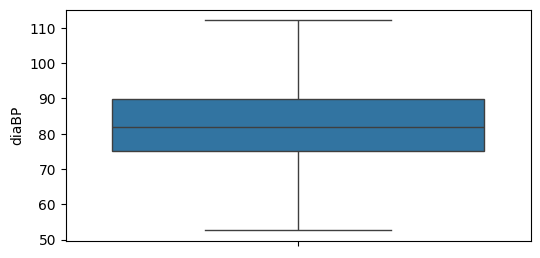

<Figure size 640x480 with 0 Axes>

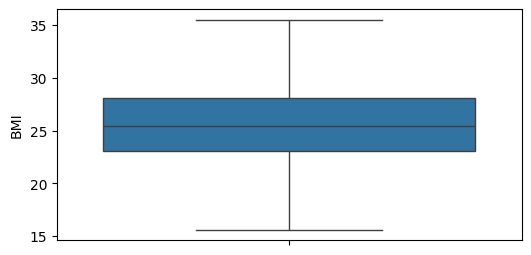

<Figure size 640x480 with 0 Axes>

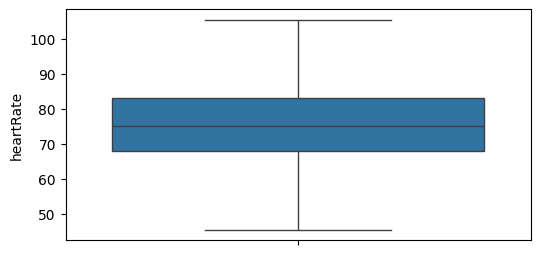

<Figure size 640x480 with 0 Axes>

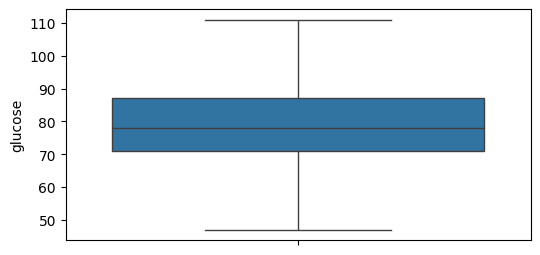

<Figure size 640x480 with 0 Axes>

In [11]:
for col in num_cols:
    df = outlier_correction(df, col, show_plot = True)
    plt.figure(figsize = (6,3))
    sns.boxplot(y = df[col])
    plt.show()
    plt.tight_layout()
    plt.pause(0.5)

## Handling Missing Values

In [12]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ["float64", "int64"]:
            df[col].fillna(df[col].mean(), inplace = True)
        else:
            df[col].fillna(df[col].mode()[0], inplace = True)


/tmp/ipython-input-1156349246.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   float64
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(10), int64(6)
memory usage: 529.9 KB
None


## Bivariate Analysis

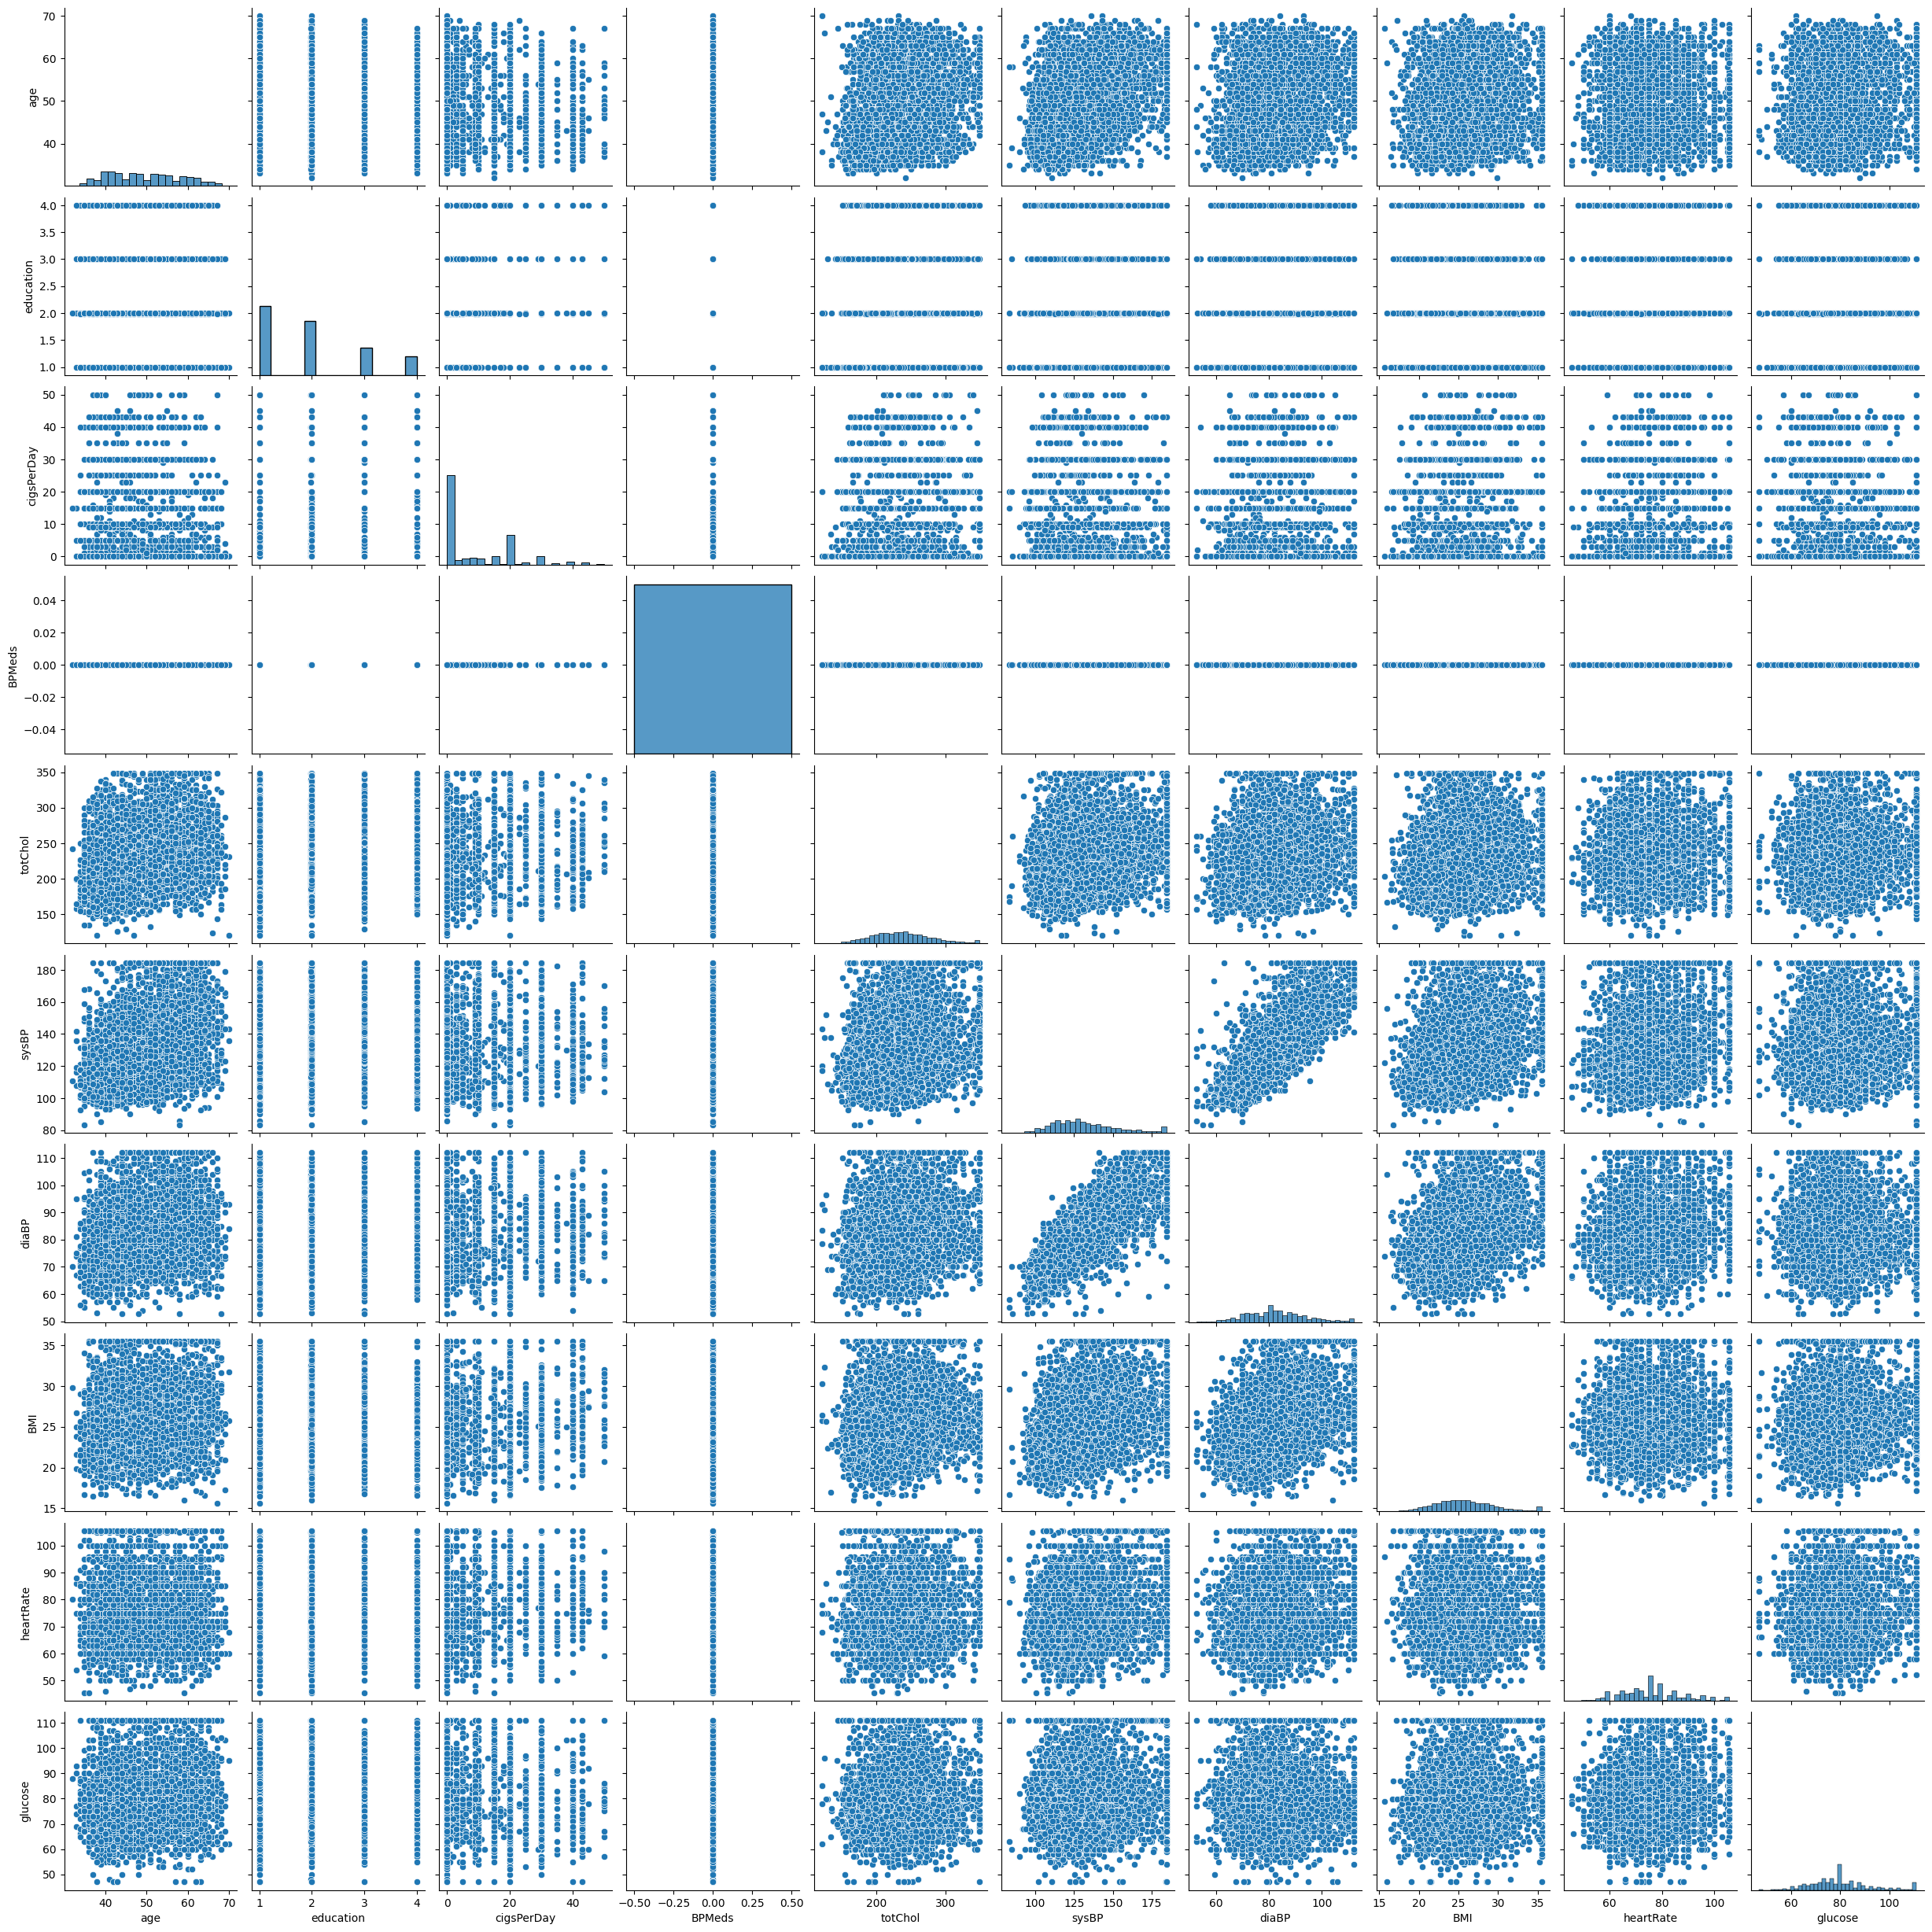

In [14]:
sns.pairplot(df[num_cols])
plt.show()

## Correlation and Heatmap

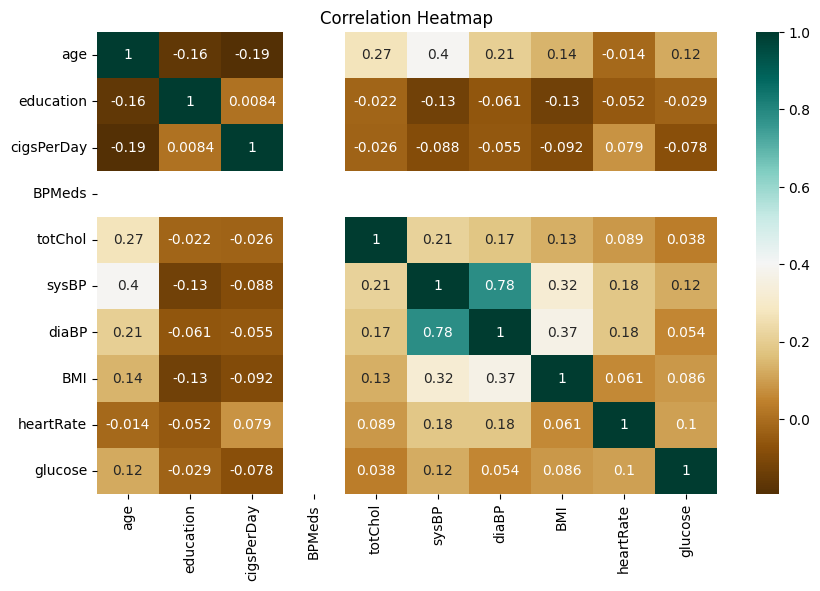

In [15]:
plt.figure(figsize = (10,6))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = "BrBG")
plt.title("Correlation Heatmap")
plt.show()

## Normalisation and Scaling

In [16]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


print(df.head())

   male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0     1 -1.234951   2.007088              0   -0.763176     0.0   
1     0 -0.418257   0.020905              0   -0.763176     0.0   
2     1 -0.184916  -0.972187              1    0.938026     0.0   
3     0  1.331800   1.013996              1    1.788627     0.0   
4     0 -0.418257   1.013996              1    1.193206     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0 -0.973368 -1.255196 -1.118089   
1                0             0         0  0.324501 -0.528621 -0.152197   
2                0             0         0  0.206513 -0.213772 -0.240006   
3                0             1         0 -0.265439  0.876090  1.077119   
4                0             0         0  1.150418 -0.092676  0.111228   

        BMI  heartRate   glucose  TenYearCHD  
0  0.330564   0.365620 -0.239238           0  
1  0.795016   1.656276 -0.320951           0  

## Random Forest

In [17]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [18]:
model = RandomForestClassifier(n_estimators = 100, max_depth = None, random_state = 42, class_weight = 'balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8490566037735849
Confusion Matrix:
 [[717   2]
 [126   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       0.60      0.02      0.04       129

    accuracy                           0.85       848
   macro avg       0.73      0.51      0.48       848
weighted avg       0.81      0.85      0.79       848



### Fine tuning

In [25]:
model = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [4, 6, 10]
}

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = 1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [5, 10, 20], 'max_features': [4, 6, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [26]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [27]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [28]:
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8455188679245284
Confusion Matrix:
 [[711   8]
 [123   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       719
           1       0.43      0.05      0.08       129

    accuracy                           0.85       848
   macro avg       0.64      0.52      0.50       848
weighted avg       0.79      0.85      0.79       848



In [29]:
feature_importances = pd.Series(best_rf.feature_importances_, index = X.columns)
feature_importances.sort_values(ascending = False, inplace = True)
print("\nTop 10 Important Features:\n", feature_importances.head(10))


Top 10 Important Features:
 age           0.175542
sysBP         0.139978
BMI           0.126730
totChol       0.120521
glucose       0.102767
diaBP         0.101255
heartRate     0.097980
cigsPerDay    0.052860
education     0.029828
male          0.019772
dtype: float64


## Regression

## Import Dataset

In [30]:
df = pd.read_csv("/content/co2.csv")

## Initial Analysis

In [31]:
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [33]:
print(df.describe(include = 'all'))

        Make      Model Vehicle Class  Engine Size(L)    Cylinders  \
count   7385       7385          7385     7385.000000  7385.000000   
unique    42       2053            16             NaN          NaN   
top     FORD  F-150 FFV   SUV - SMALL             NaN          NaN   
freq     628         32          1217             NaN          NaN   
mean     NaN        NaN           NaN        3.160068     5.615030   
std      NaN        NaN           NaN        1.354170     1.828307   
min      NaN        NaN           NaN        0.900000     3.000000   
25%      NaN        NaN           NaN        2.000000     4.000000   
50%      NaN        NaN           NaN        3.000000     6.000000   
75%      NaN        NaN           NaN        3.700000     6.000000   
max      NaN        NaN           NaN        8.400000    16.000000   

       Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
count          7385      7385                       7385.000000   
unique           27      

## Check for Duplicates

In [34]:
df.drop_duplicates(inplace = True)

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: float64(


## Outlier Detection and Correction






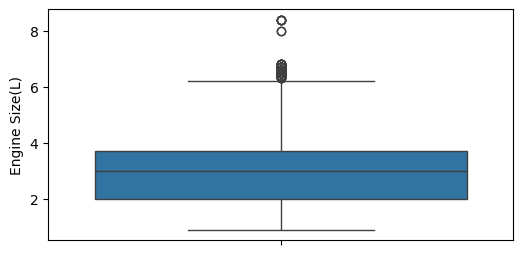

<Figure size 640x480 with 0 Axes>

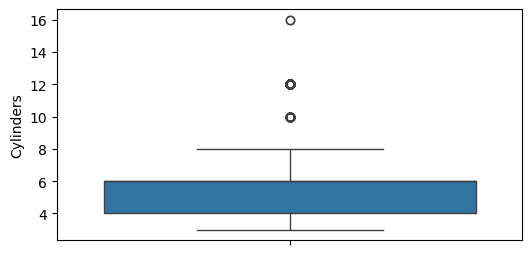

<Figure size 640x480 with 0 Axes>

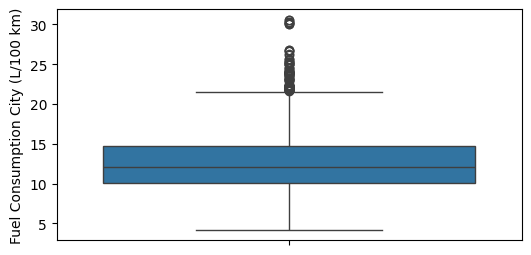

<Figure size 640x480 with 0 Axes>

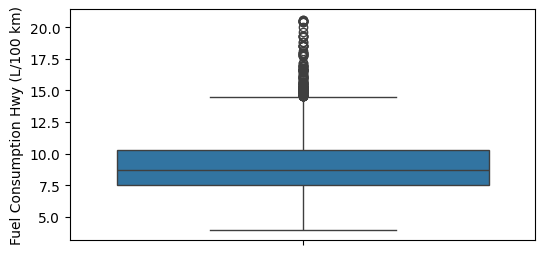

<Figure size 640x480 with 0 Axes>

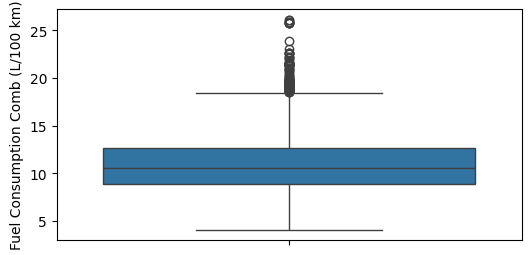

<Figure size 640x480 with 0 Axes>

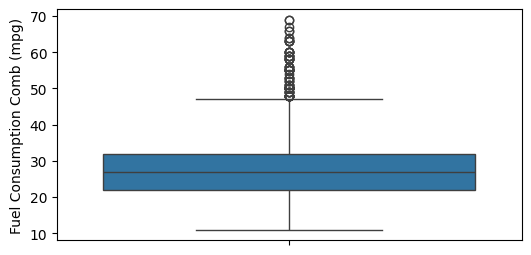

<Figure size 640x480 with 0 Axes>

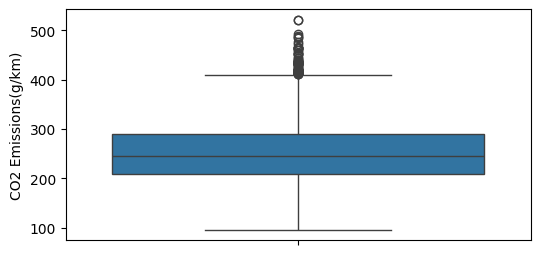

<Figure size 640x480 with 0 Axes>

In [36]:
num_cols = df.select_dtypes(include = ["float64", "int64"]).columns.tolist()

for col in num_cols:
    plt.figure(figsize = (6,3))
    sns.boxplot(y = df[col])
    plt.show()
    plt.tight_layout()
    plt.pause(0.5)


In [37]:
def outlier_correction(df, col, show_plot = True):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

    return df

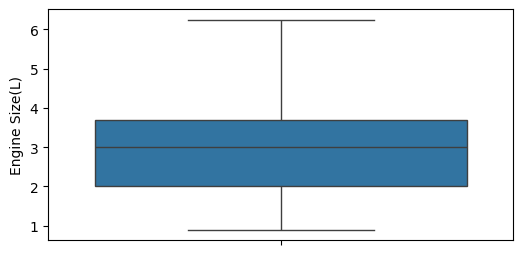

<Figure size 640x480 with 0 Axes>

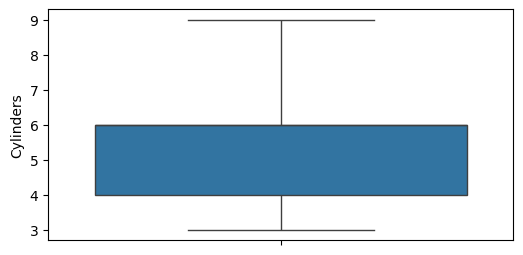

<Figure size 640x480 with 0 Axes>

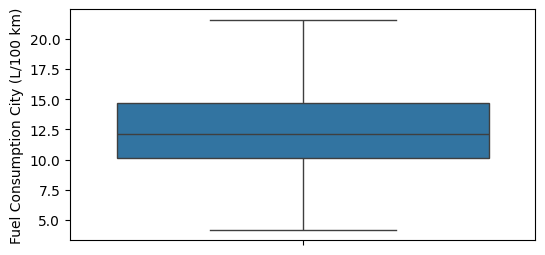

<Figure size 640x480 with 0 Axes>

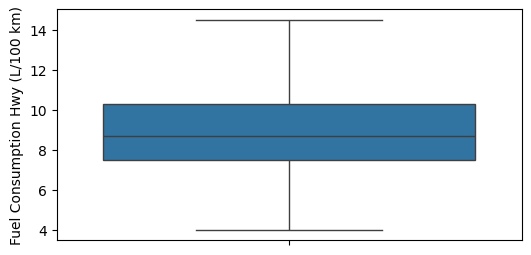

<Figure size 640x480 with 0 Axes>

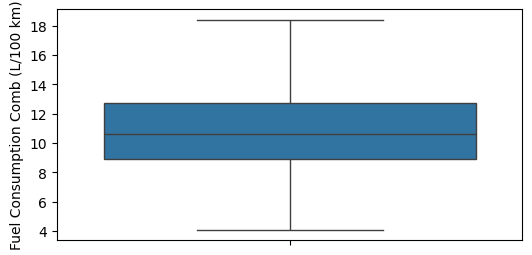

<Figure size 640x480 with 0 Axes>

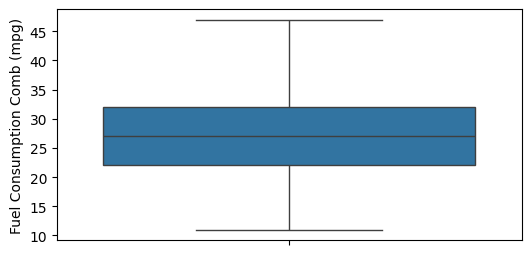

<Figure size 640x480 with 0 Axes>

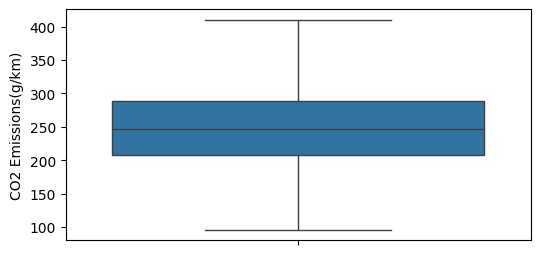

<Figure size 640x480 with 0 Axes>

In [38]:
for col in num_cols:
    df = outlier_correction(df, col, show_plot = True)
    plt.figure(figsize = (6,3))
    sns.boxplot(y = df[col])
    plt.show()
    plt.tight_layout()
    plt.pause(0.5)

## Handling Missing Values

In [39]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ["float64", "int64"]:
            df[col].fillna(df[col].mean(), inplace = True)
        else:
            df[col].fillna(df[col].mode()[0], inplace = True)


In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   float64
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   float64
 11  CO2 Emissions(g/km)               6282 non-null   float64
dtypes: float64(

## Bivariate Analysis

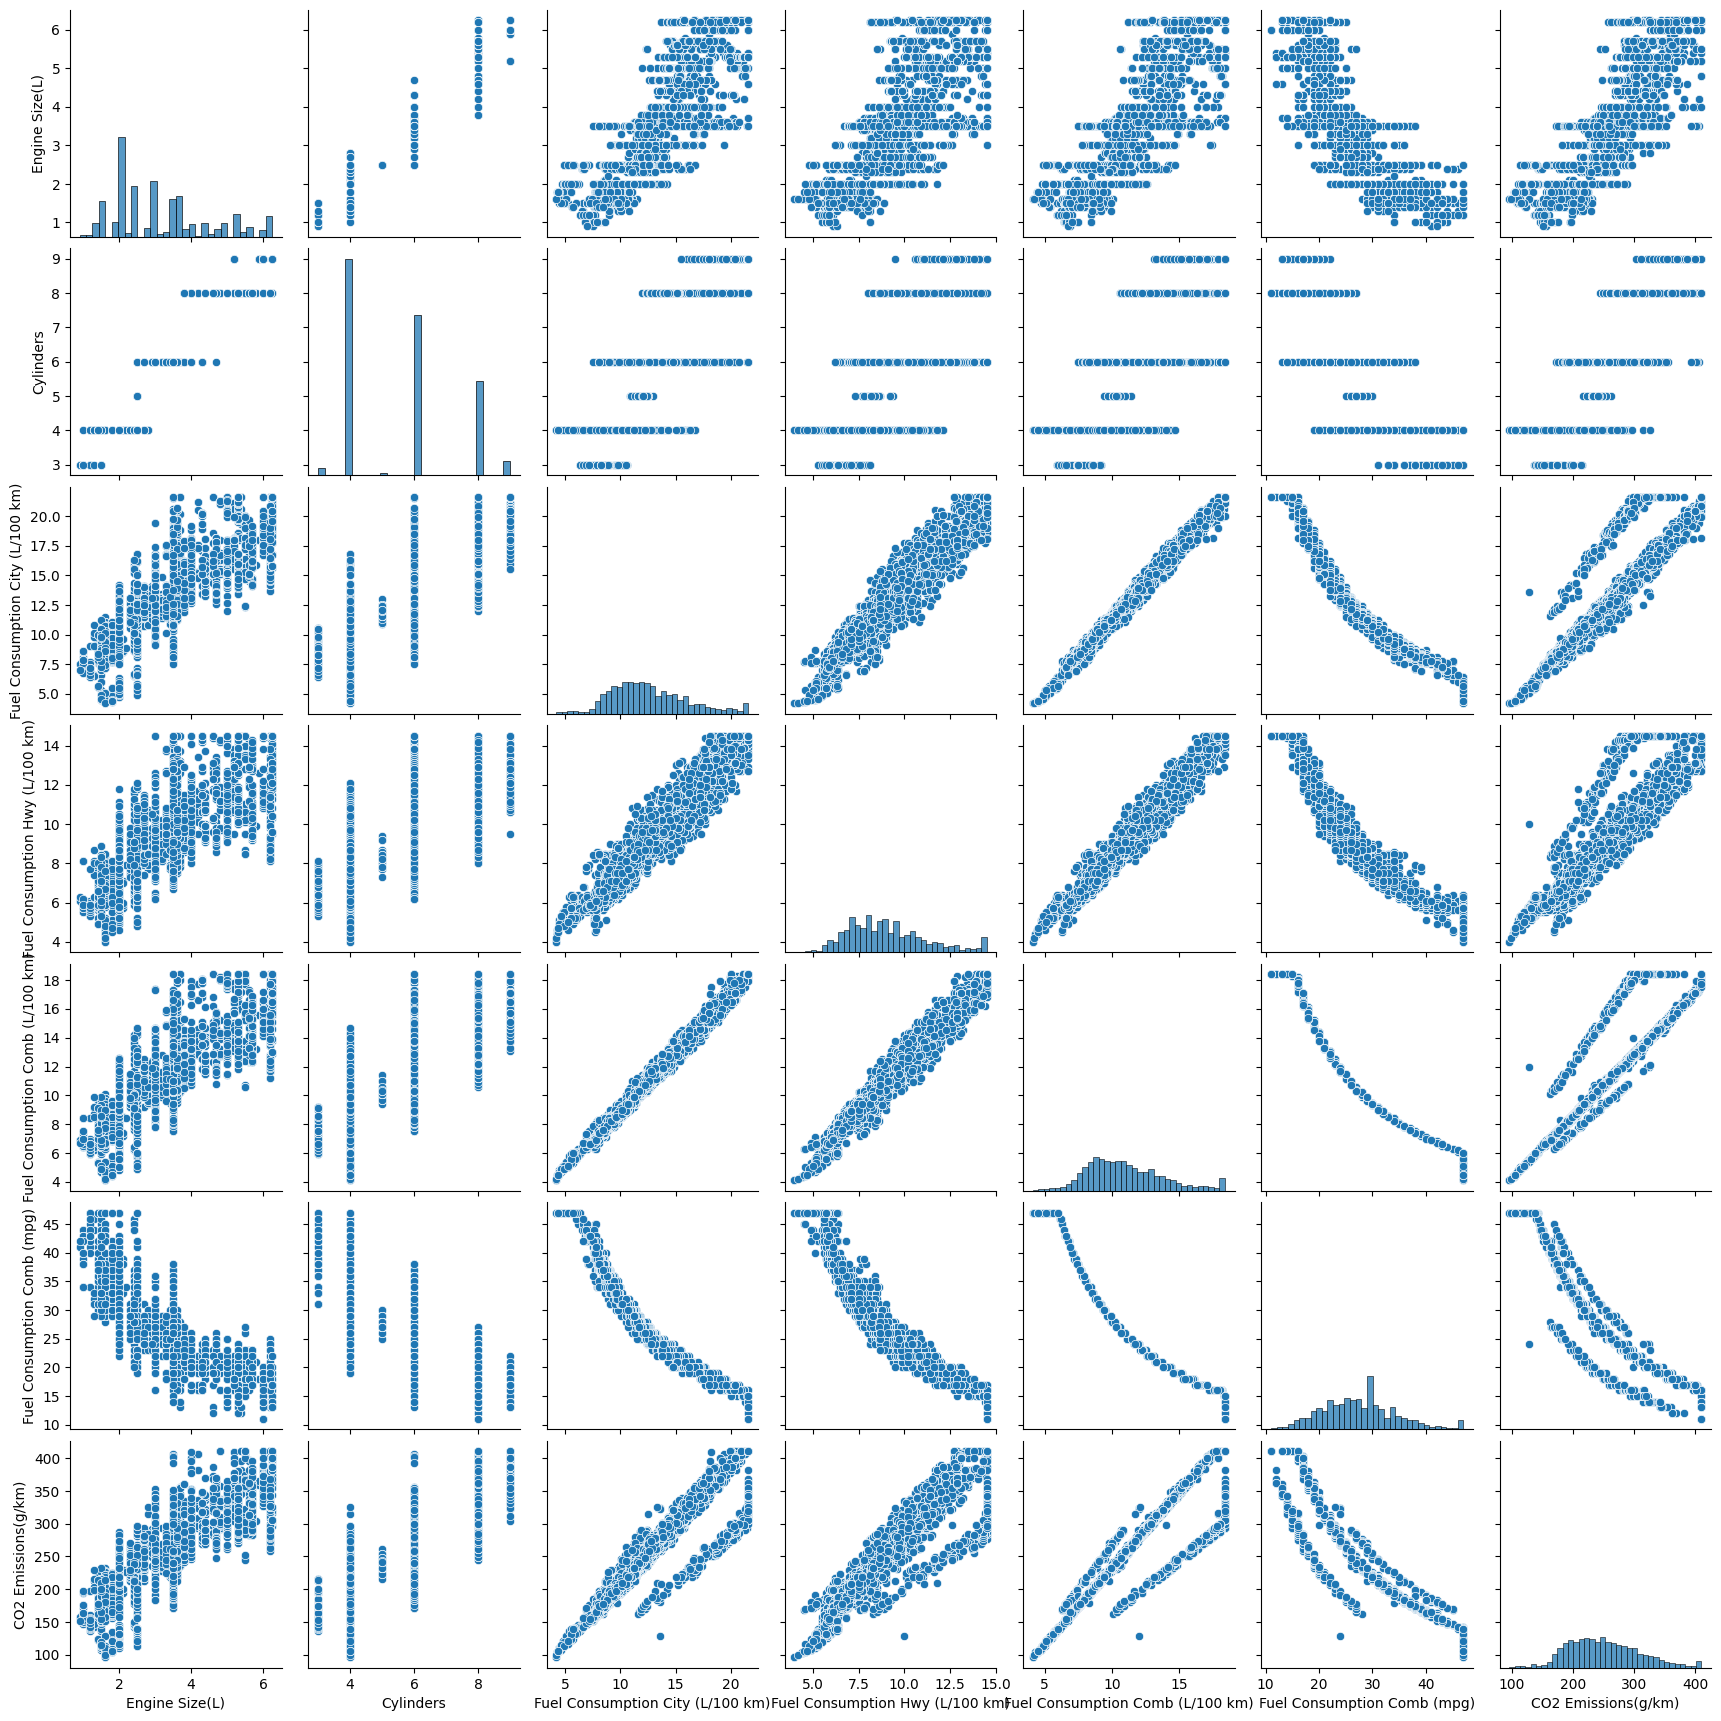

In [41]:
sns.pairplot(df[num_cols])
plt.show()

## Correlation and Heatmap

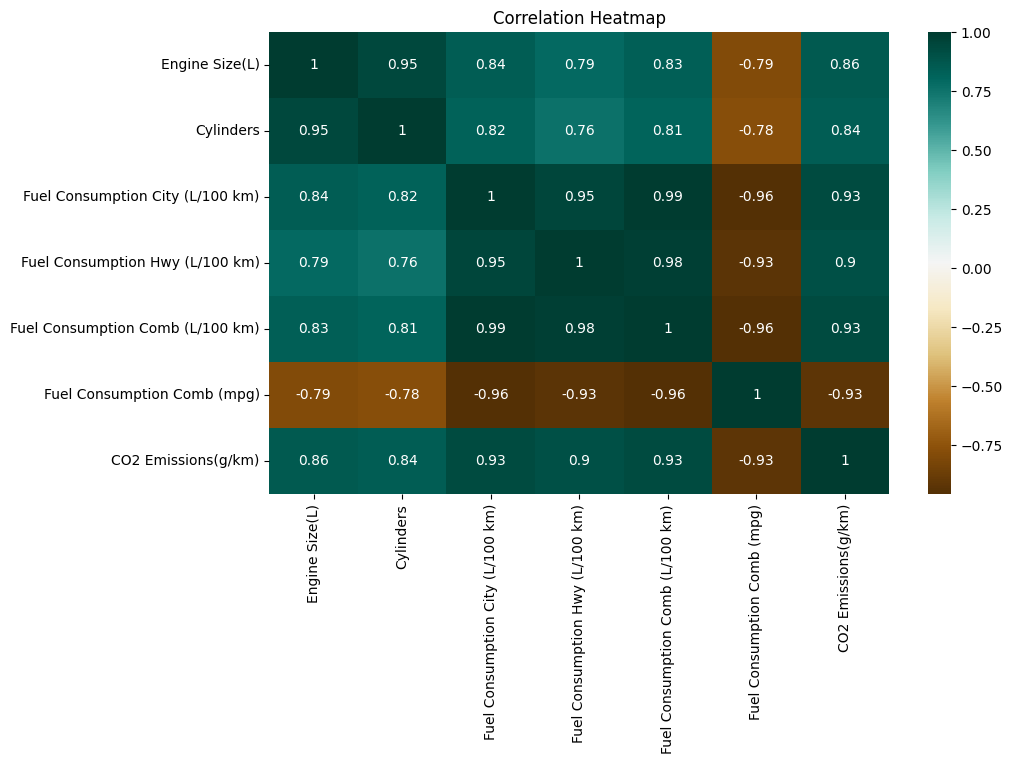

In [42]:
plt.figure(figsize = (10,6))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = "BrBG")
plt.title("Correlation Heatmap")
plt.show()

## Normalisation and Scaling

In [43]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT       -0.858034  -0.941941          AS5   
1  ACURA         ILX       COMPACT       -0.560647  -0.941941           M6   
2  ACURA  ILX HYBRID       COMPACT       -1.229767  -0.941941          AV7   
3  ACURA     MDX 4WD   SUV - SMALL        0.257166   0.276733          AS6   
4  ACURA     RDX AWD   SUV - SMALL        0.257166   0.276733          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                         -0.779197   
1         Z                         -0.400067   
2         Z                         -1.916586   
3         Z                          0.037390   
4         Z                         -0.137593   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                        -1.089352                         -0.878115   
1                        -0.621091                         -0.488642   
2                   

## Encoding

In [44]:
df = pd.get_dummies(df, drop_first = False).astype(int)

print(df.head())

   Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0               0          0                                 0   
1               0          0                                 0   
2              -1          0                                -1   
3               0          0                                 0   
4               0          0                                 0   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                               -1                                 0   
1                                0                                 0   
2                               -1                                -1   
3                                0                                 0   
4                                0                                 0   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Make_ACURA  \
0                            0                    0           1   
1                            0      

## Random Forest

In [45]:
X = df.drop(columns=['CO2 Emissions(g/km)'])
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [46]:
model = RandomForestRegressor(n_estimators = 100, max_depth = None, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
y_pred = model.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.0457
Root Mean Squared Error (RMSE): 0.2137
Mean Absolute Error (MAE): 0.0667
R-squared (R²): 0.9087


In [51]:
feature_importances = pd.Series(best_rf.feature_importances_, index = X_test.columns)
feature_importances.sort_values(ascending = False, inplace = True)
print("\nTop 10 Important Features:\n", feature_importances.head(10))

ValueError: Length of values (15) does not match length of index (2149)

### Fine tuning

In [53]:
model = RandomForestRegressor(random_state = 42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [4, 6, 10]
}

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = 1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Streaming output truncated to the last 5000 lines.
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py", line 227, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py", line 107, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partitio

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 10, 20], 'max_features': [4, 6, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [54]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [55]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 0.4692
Root Mean Squared Error (RMSE): 0.6850
Mean Absolute Error (MAE): 0.3893
R-squared (R²): 0.0616


In [57]:
feature_importances = pd.Series(best_rf.feature_importances_, index = X.columns)
feature_importances.sort_values(ascending = False, inplace = True)
print("\nTop 10 Important Features:\n", feature_importances.head(10))


Top 10 Important Features:
 Vehicle Class_SUV - STANDARD        0.027082
Model_EXPRESS 2500 PASSENGER        0.024091
Fuel Consumption Comb (mpg)         0.024079
Fuel Consumption City (L/100 km)    0.020802
Model_AMG G 65                      0.017213
Fuel Consumption Hwy (L/100 km)     0.016667
Transmission_AV10                   0.016065
Fuel Consumption Comb (L/100 km)    0.015885
Engine Size(L)                      0.013838
Cylinders                           0.013815
dtype: float64
